## CLASIFICACION MULTICLASE
Predecir la columna especie del dataset penguins

## Codificar entrada con OneHotEncoder
Para la entrada (x) se utiliza get_dummies o OneHotEncoder

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [76]:
df = sns.load_dataset('penguins')# no nesecidad de cargar CSV (csv_dataset)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [77]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [78]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

numeric_cols  = df.select_dtypes(include = np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

df[numeric_cols] = IterativeImputer(random_state=42).fit_transform(df[numeric_cols])
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Codificar categóricos
 
* species
* sland
* sex

LabelEncoder y OneHotEncoder

In [79]:
from sklearn.preprocessing import OneHotEncoder

# equivalente a pd.get_dummies drop_first=True
categoricals = df[['island', 'sex']]
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
categorials_encoded = onehot_encoder.fit_transform(categoricals)

# Obtener los nuevos nombres de las nuevas columnas generadas: 'island_Dream', 'island_Torgersen', 'sex_Male'
column_names = onehot_encoder.get_feature_names_out(categoricals.columns)

# Crear nuevo DataFrame con las nuevas columnas codificadas
df_categoricals = pd.DataFrame(categorials_encoded, columns=column_names)
df_categoricals.head(2)

c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,island_Dream,island_Torgersen,sex_Male
0,0.0,1.0,1.0
1,0.0,1.0,0.0


In [80]:
df = pd.concat([df, df_categoricals], axis=1)
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen,sex_Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,1.0,0.0


## Codificar Salida con LabelEncoder

Equivalente a .map()de Pandas

Codificar salida (y) con LabelEncoder. En la misma columna genera los valores numericos uno por cad valor categorico : 0,1,2,3....

In [81]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

numeric_cols  = df.select_dtypes(include = np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

df[numeric_cols] = IterativeImputer(random_state=42).fit_transform(df[numeric_cols])
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

df.isnull().sum()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen,sex_Male,species_int
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,1.0,1.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,1.0,0.0,0


## Particionamiento de Datos


In [82]:
X = df.drop(['species', 'species_int', 'island', 'sex'], axis=1)
y = df['species_int']

## EDAs

<Axes: >

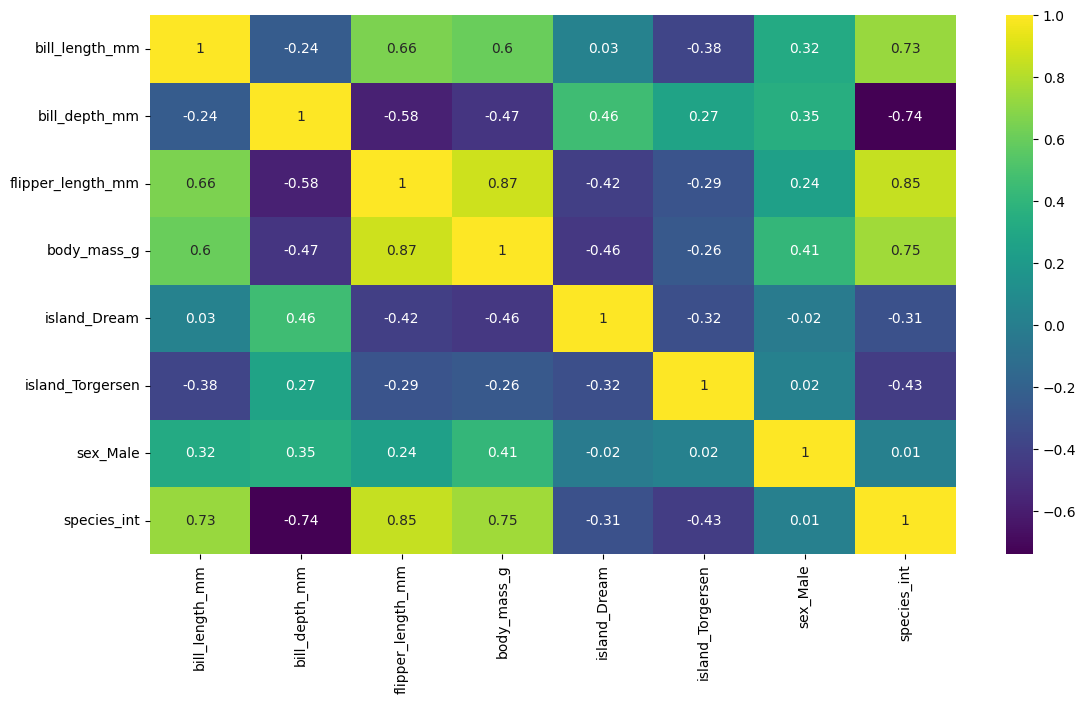

In [83]:
plt.figure(figsize=(13,7))
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True)

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

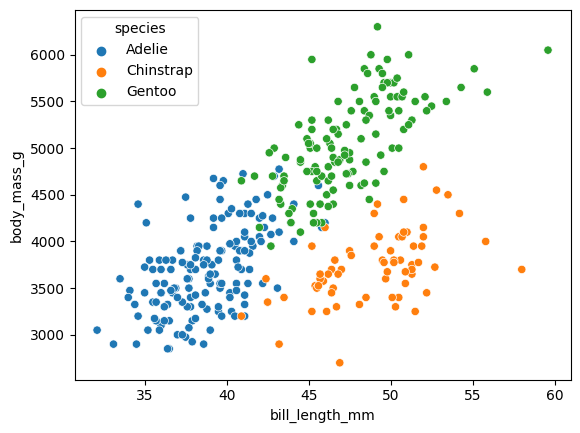

In [84]:
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')

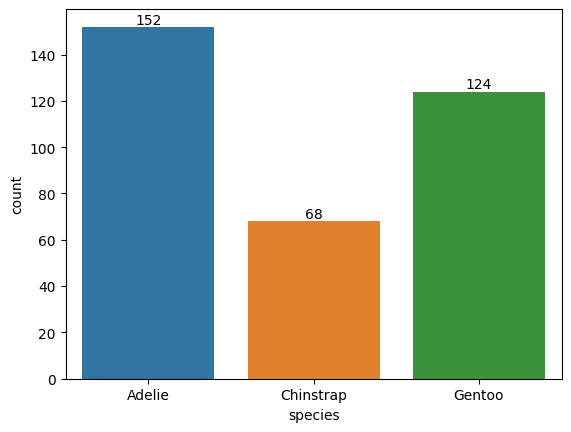

In [85]:
ax = sns.countplot(data=df, x='species')
ax.bar_label(ax.containers[0]);

## Particionamiento de Datos

In [86]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen,sex_Male,species_int
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,0.0,1.0,1.0,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,0.0,1.0,0.0,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,0.0,1.0,0.0,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,0.0,1.0,1.0,0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,0.0,1.0,0.0,0


In [87]:
X = df.drop(['species', 'species_int','island', 'sex'], axis=1)
y = df['species_int']

## Modelado

Regresion Logistica

In [88]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [89]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=  LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
y_train

118    0
289    2
193    1
5      0
210    1
      ..
188    1
71     0
106    0
270    2
102    0
Name: species_int, Length: 309, dtype: int32

## KNeighborClassifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.81      0.70        16
           1       0.33      0.12      0.18         8
           2       0.82      0.82      0.82        11

    accuracy                           0.66        35
   macro avg       0.59      0.59      0.57        35
weighted avg       0.62      0.66      0.62        35



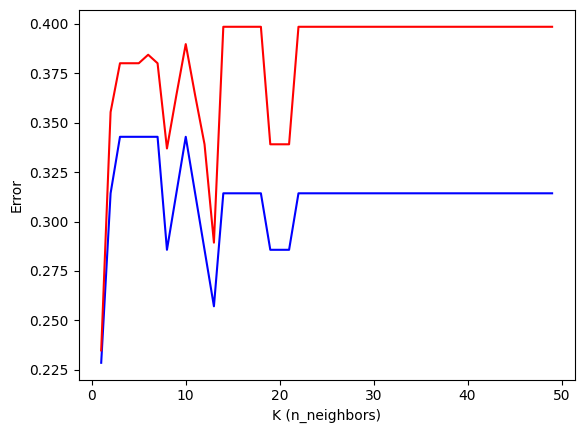

In [92]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_error = []
f1_error = []

for k in range(1, 50): # itera los números impares
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    accuracy_error.append(error)

    f1 = f1_score(y_test, y_pred, average='weighted') # Clasificación multiclase requiere parámetro average
    error = 1 - f1
    f1_error.append(error)

plt.plot(range(1, 50), accuracy_error, c='b')
plt.plot(range(1, 50), f1_error, c='r')

plt.ylabel('Error')
plt.xlabel('K (n_neighbors)');
        

## SVC

In [94]:
from sklearn.svm import SVC

#model = SVC()
model = SVC (class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72        16
           1       0.00      0.00      0.00         8
           2       0.83      0.91      0.87        11

    accuracy                           0.69        35
   macro avg       0.48      0.59      0.53        35
weighted avg       0.54      0.69      0.60        35



c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Escalado de datos



In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()#  la escala de datos de 0a1
# fit_transform: calcula y tranforma los datos
# transform: solo transforma utilizando utilizando los calculos obtenidos en train para que se haga con una prediccion 
# una prediccion sobre los datos transformados de la misma manera con los datos que se entreno
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 